# Conjecture

Randomised response provides the most privacy and additive mechanism provides the least privacy for a given $p$. However, the reconstruction error goes the other way.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from collections import Counter, defaultdict
import sys
import seaborn as sns

In [2]:
# Population Statistics
def create_population(num_people, positive_fraction):
    '''
    num_people (int) : Number of users
    positive_fraction [0,1] : Avg fraction of users that vote yes.
    '''
    assert positive_fraction <= 1 and positive_fraction >=0 
    return [1 if np.random.random() <= positive_fraction else 0 for i in range(num_people)]

def error(true, pred):
    return abs(true - pred)

In [6]:
def additive_noise(population, p):
    
    n = len(population)
    noise_to_add = np.random.binomial(n, p)
    
    return sum(population) + noise_to_add - n*p
    

In [7]:
def sample(_population, p):
   
    population = _population[:]
    n = len(population)
    np.random.shuffle(population)
    num_to_sample = np.random.binomial(n, p)
    
    samples = population[:num_to_sample]
    estimated_pos_frac = sum(samples)/len(samples)
    
    return estimated_pos_frac*n

In [13]:
def randomised_response(_population, p):
    
    
    population = _population[:]
    n = len(population)
    lamb = n - n*p # I selected p to be the prob of truth
    
    np.random.shuffle(population)
    num_to_sample = np.random.binomial(n, p)
    samples = population[:num_to_sample]
    
    num_random = n - num_to_sample
    sum_y = sum(samples) + np.random.binomial(num_random, 0.5) # This is what the analyser sees
    
    return n/(n-lamb)*(sum_y - lamb/2)

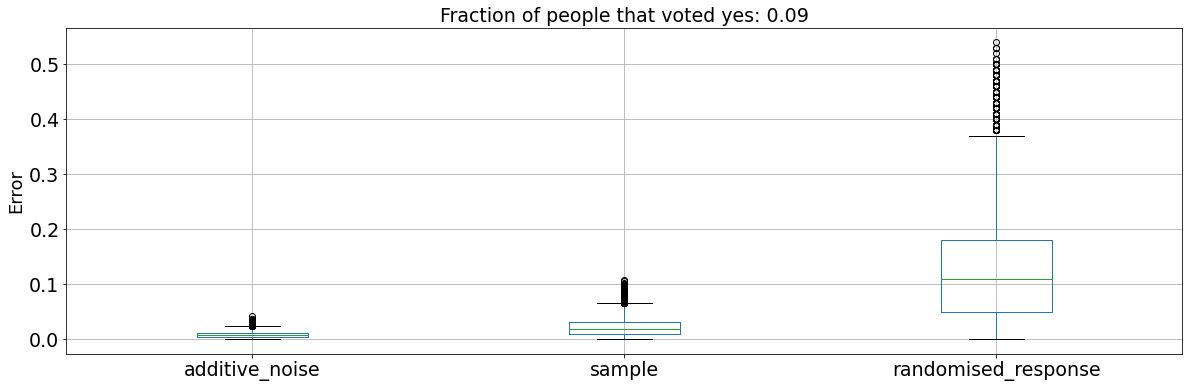

In [56]:
NUM_TRIALS = 10000
n = 1000
k = 0.1
population = create_population(n, k)

output = defaultdict(list)
for trial in range(NUM_TRIALS):    
    for f in [additive_noise, sample, randomised_response]:
        output[str(f).split()[1]].append(f(population, k))
        
ax = (abs(sum(population) - pd.DataFrame(output))/n).boxplot(figsize=(20,6), fontsize=19)
ax.set_ylabel('Error', fontsize=18)
ax.set_title('Fraction of people that voted yes: {}'.format(sum(population)/n), fontsize=19)
ax.set_yscale('linear')

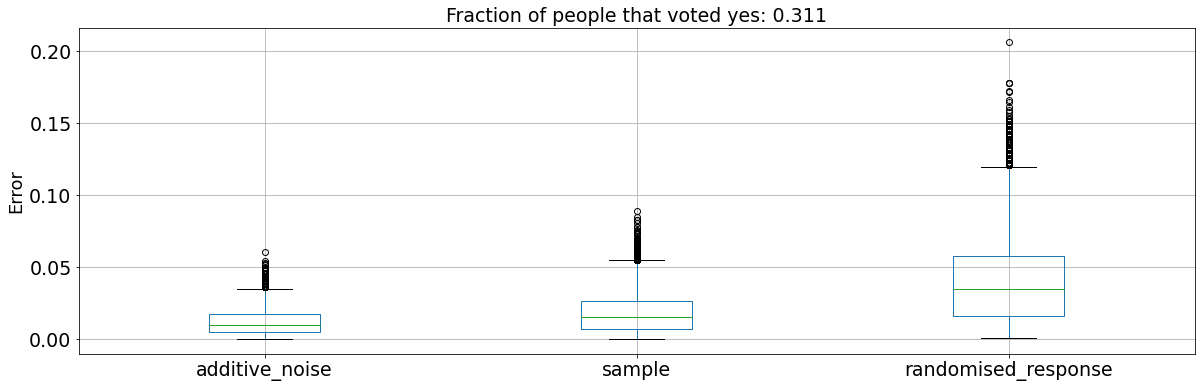

In [57]:
NUM_TRIALS = 10000
n = 1000
k = 0.3
population = create_population(n, k)

output = defaultdict(list)
for trial in range(NUM_TRIALS):    
    for f in [additive_noise, sample, randomised_response]:
        output[str(f).split()[1]].append(f(population, k))
        
ax = (abs(sum(population) - pd.DataFrame(output))/n).boxplot(figsize=(20,6), fontsize=19)
ax.set_ylabel('Error', fontsize=18)
ax.set_title('Fraction of people that voted yes: {}'.format(sum(population)/n), fontsize=19)
ax.set_yscale('linear')

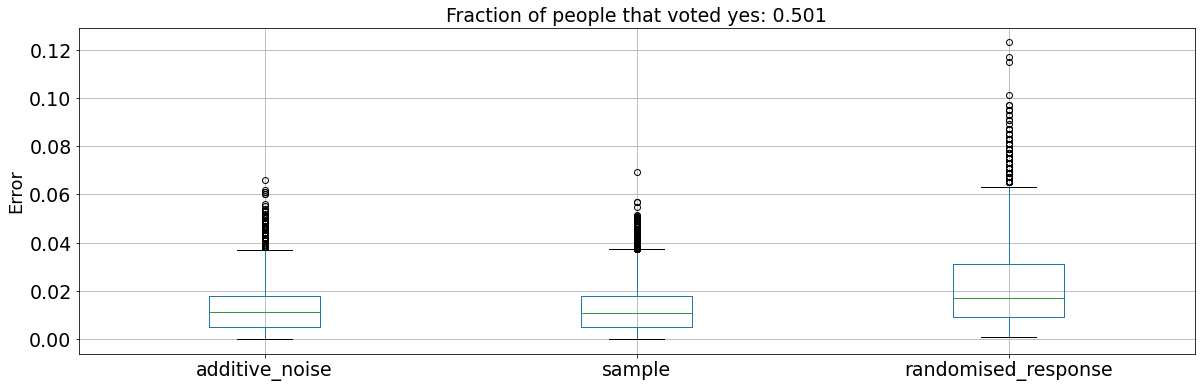

In [58]:
NUM_TRIALS = 10000
n = 1000
k = 0.5
population = create_population(n, k)

output = defaultdict(list)
for trial in range(NUM_TRIALS):    
    for f in [additive_noise, sample, randomised_response]:
        output[str(f).split()[1]].append(f(population, k))
        
ax = (abs(sum(population) - pd.DataFrame(output))/n).boxplot(figsize=(20,6), fontsize=19)
ax.set_ylabel('Error', fontsize=18)
ax.set_title('Fraction of people that voted yes: {}'.format(sum(population)/n), fontsize=19)
ax.set_yscale('linear')

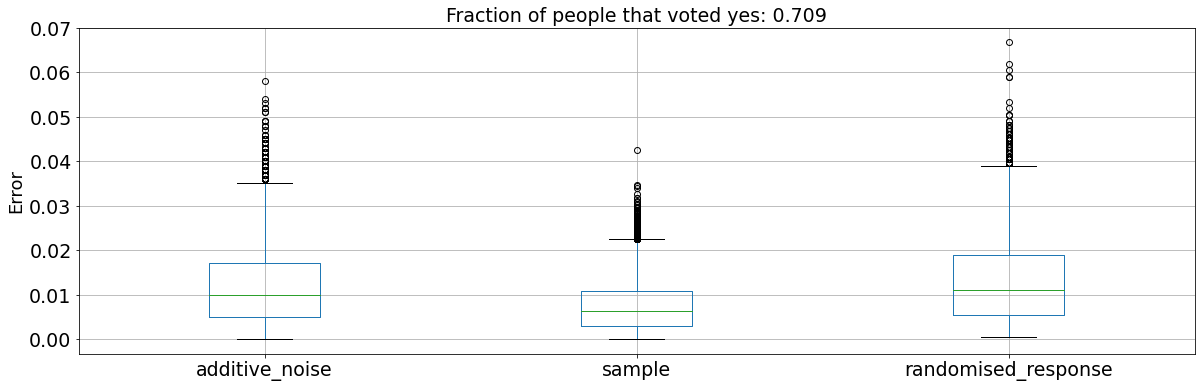

In [59]:
NUM_TRIALS = 10000
n = 1000
k = 0.7
population = create_population(n, k)

output = defaultdict(list)
for trial in range(NUM_TRIALS):    
    for f in [additive_noise, sample, randomised_response]:
        output[str(f).split()[1]].append(f(population, k))
        
ax = (abs(sum(population) - pd.DataFrame(output))/n).boxplot(figsize=(20,6), fontsize=19)
ax.set_ylabel('Error', fontsize=18)
ax.set_title('Fraction of people that voted yes: {}'.format(sum(population)/n), fontsize=19)
ax.set_yscale('linear')

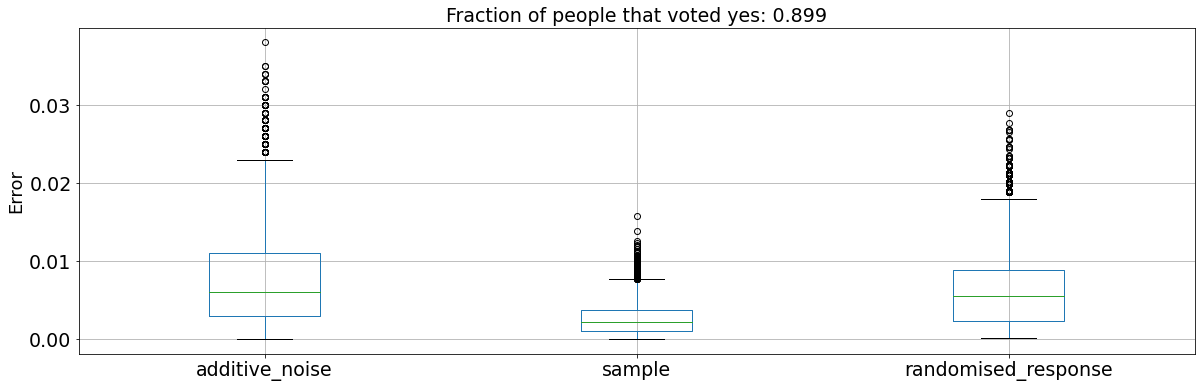

In [60]:
NUM_TRIALS = 10000
n = 1000
k = 0.9
population = create_population(n, k)

output = defaultdict(list)
for trial in range(NUM_TRIALS):    
    for f in [additive_noise, sample, randomised_response]:
        output[str(f).split()[1]].append(f(population, k))
        
ax = (abs(sum(population) - pd.DataFrame(output))/n).boxplot(figsize=(20,6), fontsize=19)
ax.set_ylabel('Error', fontsize=18)
ax.set_title('Fraction of people that voted yes: {}'.format(sum(population)/n), fontsize=19)
ax.set_yscale('linear')

In [2]:
# Grahams new sample and threshold scheme:

Text(0.5, 0, 'Epsilon')

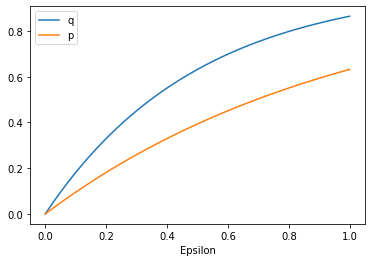

In [20]:
eps = np.linspace(0.00001, 1, 100)
p = 0.5
temp  = {}
temp2 = {}
temp3 = {}
for ep in eps:
    p = (1- np.exp(-ep))
    temp[ep] = (1 - np.exp(-ep) + np.exp(-ep)*p)
    temp2[ep] = p
#     temp3[ep] = 1 - np.exp(-2*ep)
    
ax = pd.DataFrame([temp,
                  temp2,
#                   temp3
                  ], index=['q',
                                    'p', 
#                                     'meh'
                                   ]).T.plot()
ax.set_xlabel('Epsilon')

Text(0.5, 0, 'Epsilon')

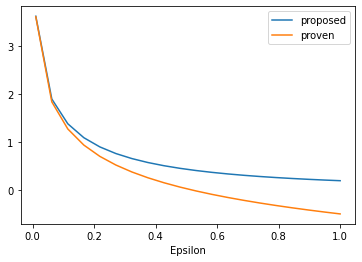

In [25]:
eps = np.linspace(0.01, 1, 20)

f1  = {}
f2 = {}
for ep in eps:
    f1[ep] = np.log(1 + 1/ep) - 1/(1 + ep)
    f2[ep] = np.log(1/ep) - 1/(1 + ep)

    
ax = pd.DataFrame([f1,
                  f2,
                  ], index=['proposed',
                            'proven']).T.plot()
ax.set_xlabel('Epsilon')